In [0]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [5]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [7]:
df = pd.read_csv("data/shoes_prices_usd.csv", low_memory=False)
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [11]:
mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [14]:
[3] * 5

[3, 3, 3, 3, 3]

In [15]:
y_true = df.prices_amountmin
y_pred = [mean_price] * df.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

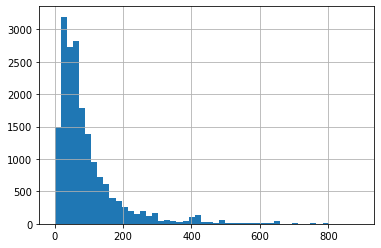

In [16]:
df.prices_amountmin.hist(bins = 50)

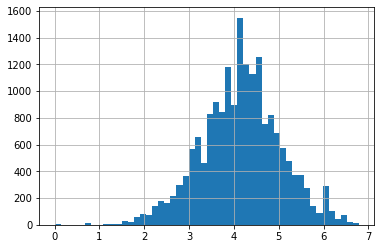

In [17]:
np.log1p(df.prices_amountmin).hist(bins = 50)

In [18]:
y_true = df.prices_amountmin
y_pred = [np.median(df.prices_amountmin)] * df.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [19]:
y_true = df.prices_amountmin
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * df.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [20]:
df.brand.value_counts()

Nike                1709
PUMA                 574
Ralph Lauren         524
New Balance          361
VANS                 356
                    ... 
Ralph Lauren RRL       1
Ellie                  1
Stance                 1
Nerd Optix             1
American Eagle         1
Name: brand, Length: 1856, dtype: int64

In [0]:
df["brand_cat"] = df.brand.factorize()[0]

In [47]:
df.brand_cat.head

<bound method NDFrame.head of 0           0
1           0
2           1
3           1
4           1
         ... 
18275    1855
18276     307
18277     411
18278     411
18279     411
Name: brand_cat, Length: 18280, dtype: int64>

In [28]:
feats  = ["brand_cat"]

X = df[feats].values
y = df.prices_amountmin.values

model = DecisionTreeRegressor(max_depth = 5)

scores = cross_val_score(model, X, y, scoring= "neg_mean_absolute_error")
np.mean(scores), np.std(scores)


(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df.prices_amountmin.values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring= "neg_mean_absolute_error")
  return(np.mean(scores), np.std(scores))



In [42]:
df.manufacturer.value_counts()

Puma                     476
Nike                     374
New Balance              249
VANS                     170
Reebok                   128
                        ... 
Venum                      1
Amer Sports                1
AGS Footwear               1
Professional's Choice      1
Bugatchi                   1
Name: manufacturer, Length: 618, dtype: int64

In [49]:
df["manufacturer_cat"] = df.manufacturer.factorize()[0]
df["manufacturer_cat"].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: manufacturer_cat, dtype: int64

In [72]:
feats_1 = ["brand_cat"]
feats_2 = ["manufacturer_cat"]
feats_3 = ["brand_cat", "manufacturer_cat"]

print("Wyniki dla brand:", run_model(feats_1))
print("Wyniki dla manufacturer:", run_model(feats_2))
print("Wyniki dla brand i manufacturer:", run_model(feats_3))

Wyniki dla brand: (-58.38655694633361, 4.223555478221712)
Wyniki dla manufacturer: (-63.133649278023746, 3.394307434888982)
Wyniki dla brand i manufacturer: (-58.53930419908595, 4.311223231615441)
